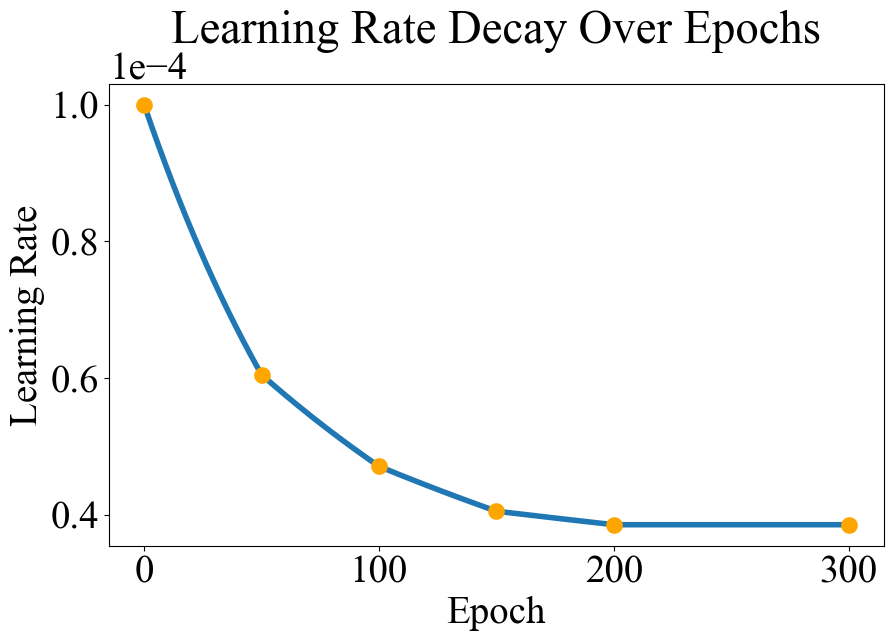

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为 Times New Roman
plt.rc('font', family='Times New Roman')
plt.rcParams['font.size'] = 28  # 设置全局字号为 24

# 初始学习率
initial_lr = 1e-4

# 定义训练阶段的区间和对应的学习率衰减权重
epochs_intervals = [50, 100, 150, 200, 300, 500]  # 假设最后一个阶段延伸到500 epoch
decay_weights = [0.99, 0.995, 0.997, 0.999, 1.0]

# 初始化学习率列表和关键点列表
lrs = [initial_lr]
epoch_marks = [0]  # 记录每个权重变更点的epoch

# 计算每个区间的实际学习率
for i, weight in enumerate(decay_weights):
    current_epoch = 0 if i == 0 else epochs_intervals[i-1]
    next_epoch = epochs_intervals[i]
    for epoch in range(current_epoch, next_epoch):
        new_lr = lrs[-1] * weight
        lrs.append(new_lr)
    epoch_marks.append(next_epoch)  # 添加每个区间最后一个epoch索引

# 提取关键点的学习率
key_points_lr = [lrs[index] for index in epoch_marks]


# 绘制学习率变化图
plt.figure(figsize=(10, 6))

plt.plot(lrs, label='Learning Rate', lw=4)
plt.scatter(epoch_marks, key_points_lr, color='orange', zorder=3,linewidths = 6)  # 在关键节点上绘制红点
plt.xlabel('Epoch',)
plt.ylabel('Learning Rate')

# 设置y轴为科学计数法
ax = plt.gca()  # 获取当前轴
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.title('Learning Rate Decay Over Epochs')
plt.savefig('Learning_Rate_Decay_Plot.svg')  # 保存图像到当前目录下
plt.grid = 'On'
plt.show()


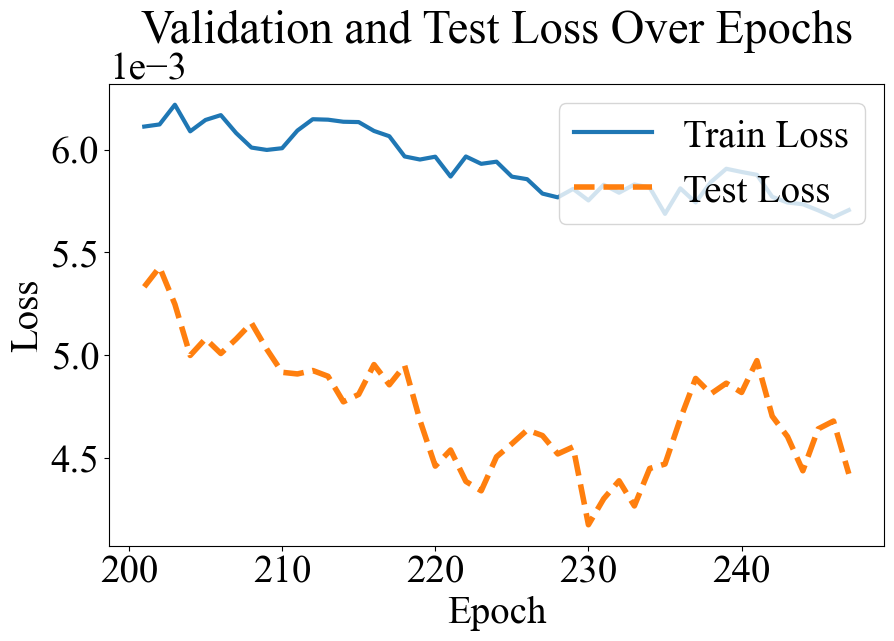

In [59]:
import pandas as pd
window_size = 6

train = pd.read_csv('run-24-05-17.14-51-36_train-tag-epoch_bce-loss.csv')['Value'][198:250].rolling(window=window_size, center=True).mean()
test = pd.read_csv('run-24-05-17.14-51-36_validation-tag-epoch_bce-loss.csv')['Value'][198:250].rolling(window=window_size, center=True).mean()

# 绘制验证集和测试集损失
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train Loss', lw=3)
plt.plot(test, label='Test Loss', linestyle='--', lw=4)
plt.title('Validation and Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# 设置y轴为科学计数法
ax = plt.gca()  # 获取当前轴
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.legend(loc = 1) 
plt.grid = 'off'
plt.savefig('Loss_Decay_Plot_200.svg')  # 保存图像到当前目录下
plt.show()

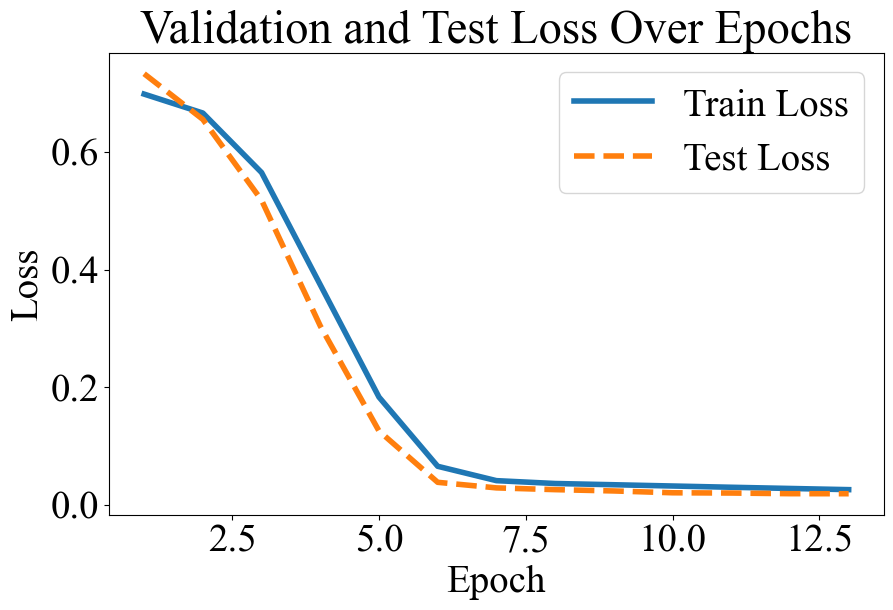

In [61]:
window_size = 3
train = pd.read_csv('run-24-05-17.14-51-36_train-tag-epoch_bce-loss.csv')['Value'][0:15].rolling(window=window_size, center=True).mean()
test = pd.read_csv('run-24-05-17.14-51-36_validation-tag-epoch_bce-loss.csv')['Value'][0:15].rolling(window=window_size, center=True).mean()

# 绘制验证集和测试集损失
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train Loss', lw=4)
plt.plot(test, label='Test Loss', linestyle='--', lw=4)
plt.title('Validation and Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# 设置y轴为科学计数法
ax = plt.gca()  # 获取当前轴
# ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.legend(loc = 1) 
plt.grid = 'off'
plt.savefig('Loss_Decay_Plot_15.svg')  # 保存图像到当前目录下
plt.show()

In [54]:
'''
处理结果数据
'''
class WatermarkAttack:
    def __init__(self, attack_method, attack_function, *attack_parameters):
        self.attack_method = attack_method
        self.attack_function = attack_function
        self.attack_parameters = attack_parameters

import os
import glob
base_patch = '/home/zqj/image-watermarket-solve1/TestResult/S128L64-F-45/'
all_att =['裁剪','高斯噪声','Dropout','JPEG压缩','椒盐噪声','高斯模糊','中值滤波']
image_index = 27
record = []
sum = 0
for att in all_att:
    
    after_att = base_patch + att + '/攻击后图像'
    all_attimg = sorted(glob.glob(f"{after_att}/{image_index}_*.bmp"))
    args = [str.split(file, '_')[-1].replace('.bmp','') for file in all_attimg]
    after_ext = base_patch + att + '/提取水印图像'
    all_waters = sorted(glob.glob(f"{after_ext}/{image_index}_*.bmp"))
    all_ber = [str.split(file, '_')[-1].replace('.bmp','') for file in all_waters]
    result_doc = [all_attimg, args, all_waters, all_ber]
    record.append(result_doc)
    sum += len(all_attimg)

In [55]:
def select_indices(n):
    if n <= 4:
        # 如果n小于等于4，不需要选取，返回空列表
        return [i for i in range(n)]
    else:
        # 如果n大于4，均匀选取4个索引
        # linspace生成4个均匀间隔的浮点数，从0到n-1
        indices = np.linspace(0, n-1, num=4, endpoint=True)
        # 将浮点索引转换为整数索引
        return [int(round(index)) for index in indices]
select_indices(2)

[0, 1]

In [56]:
from docx import Document
from docx.shared import Cm
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_ALIGN_VERTICAL



# 创建一个新的Word文档
doc = Document('Decoder实验结果[zqj-1].docx')

x_i = 0
# 添加表格，指定行数和列数
table = doc.add_table(rows=20, cols=4)
# 填充表格单元格
for i in range(len(record)):
    att_a = record[i]
    index = select_indices(len(att_a[0]))
    for j in range(4):
        jx = index[j]
        if x_i > sum:
            break
        cell = table.cell(i, j)
        cell.width = Cm(6.43)
        img = att_a[0][jx]
        exw = att_a[2][jx]
        # 添加图片
        paragraph_orig = cell.paragraphs[0]
        run = paragraph_orig.add_run()
        run.add_picture(img, width=Cm(3.8),height=Cm(3.8))
        run.add_picture(exw, width=Cm(2.15), height=Cm(2.15))
        cell.add_paragraph(f'{all_att[i]}={att_a[1][jx]},BER={att_a[3][jx]}')
        # 添加文字
        # 设置单元格中的段落水平居中
        for paragraph in cell.paragraphs:
            paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
            paragraph.paragraph_format.first_line_indent = Cm(0)
        # 设置单元格中的文字垂直居中
        cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
    if x_i > sum:
        break

# 保存文档
doc.save('table_with_27.docx')


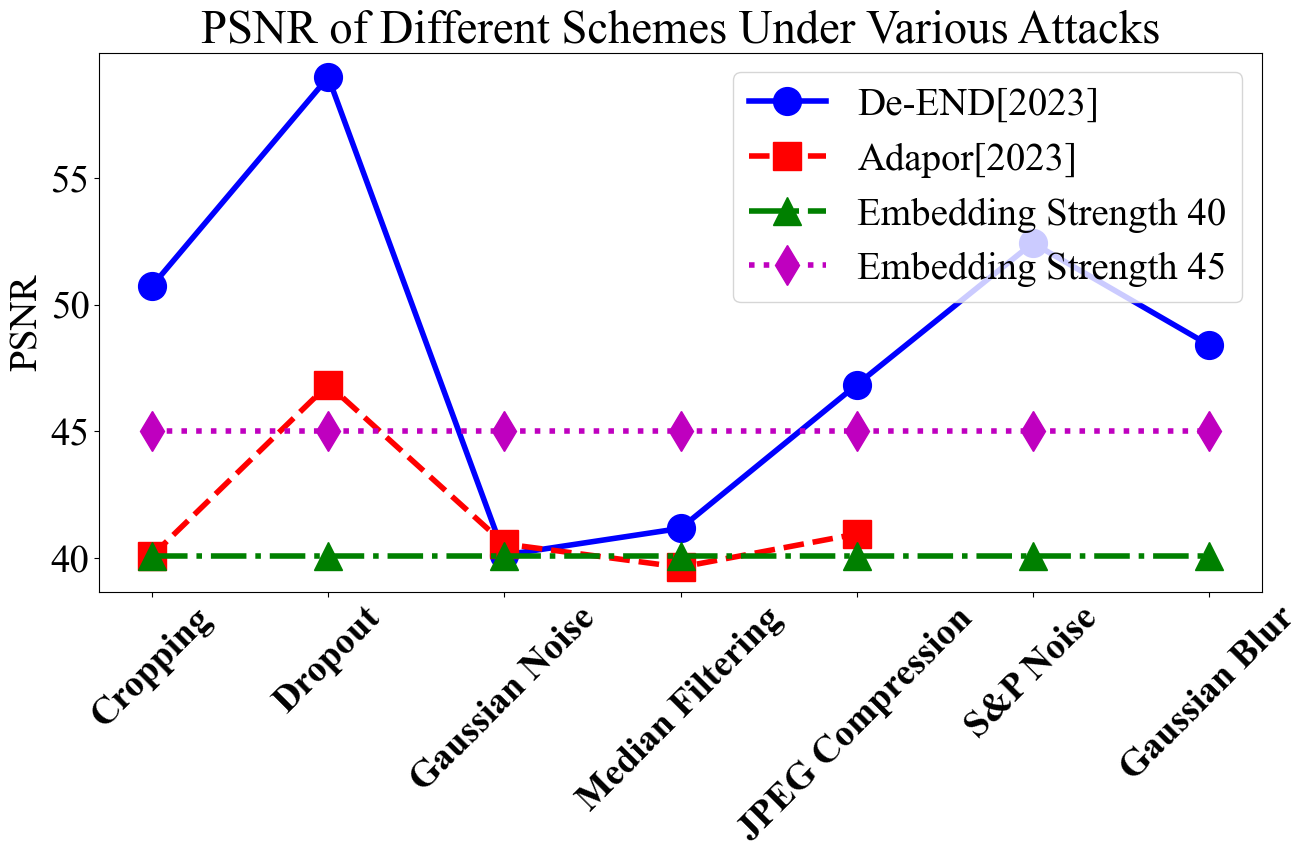

In [110]:
import matplotlib.pyplot as plt
import numpy as np
plt.close()
# Data definition
attack_types = ["Cropping", "Dropout", "Gaussian Noise", "Median Filtering", "JPEG Compression", "S&P Noise", "Gaussian Blur"]
De_END_2023 = [50.74, 58.97, 40.13, 41.18, 46.84, 52.43, 48.41]
Adapor_2023 = [40.11, 46.85, 40.57, 39.65, 40.96, None, None]  # 使用 None 代替 '-'
scheme_40 = [40.08, 40.08, 40.08, 40.08, 40.08, 40.08, 40.08]
scheme_45 = [45.0337, 45.0337, 45.0337, 45.0337, 45.0337, 45.0337, 45.0337]



# Setting up the plot
plt.figure(figsize=(15, 7))

# Plotting each dataset with specified line width
plt.plot(attack_types, De_END_2023, label="De-END[2023]", marker='o', linestyle='-', color='b', linewidth=4,
         markersize=20)
plt.plot(attack_types, Adapor_2023, label="Adapor[2023]", marker='s', linestyle='--', color='r', linewidth=4,markersize=20)
plt.plot(attack_types, scheme_40, label="Embedding Strength 40", marker='^', linestyle='-.', color='g', linewidth=4,markersize=20)
plt.plot(attack_types, scheme_45, label="Embedding Strength 45", marker='d', linestyle=':', color='m', linewidth=4,markersize=20)

# Adding legend with large font size
plt.legend(loc=1)

# Adding title and labels with specified font sizes
plt.title('PSNR of Different Schemes Under Various Attacks')
# plt.xlabel('Type of Attack', fontsize=13)  # Set font size for x-axis labels
plt.ylabel('PSNR')


# Set x-axis labels with large font size and rotation for better readability
plt.xticks(attack_types, fontsize=27, rotation=45, fontweight='bold')  # Rotate labels to avoid overlap

# Displaying the plot
plt.show()


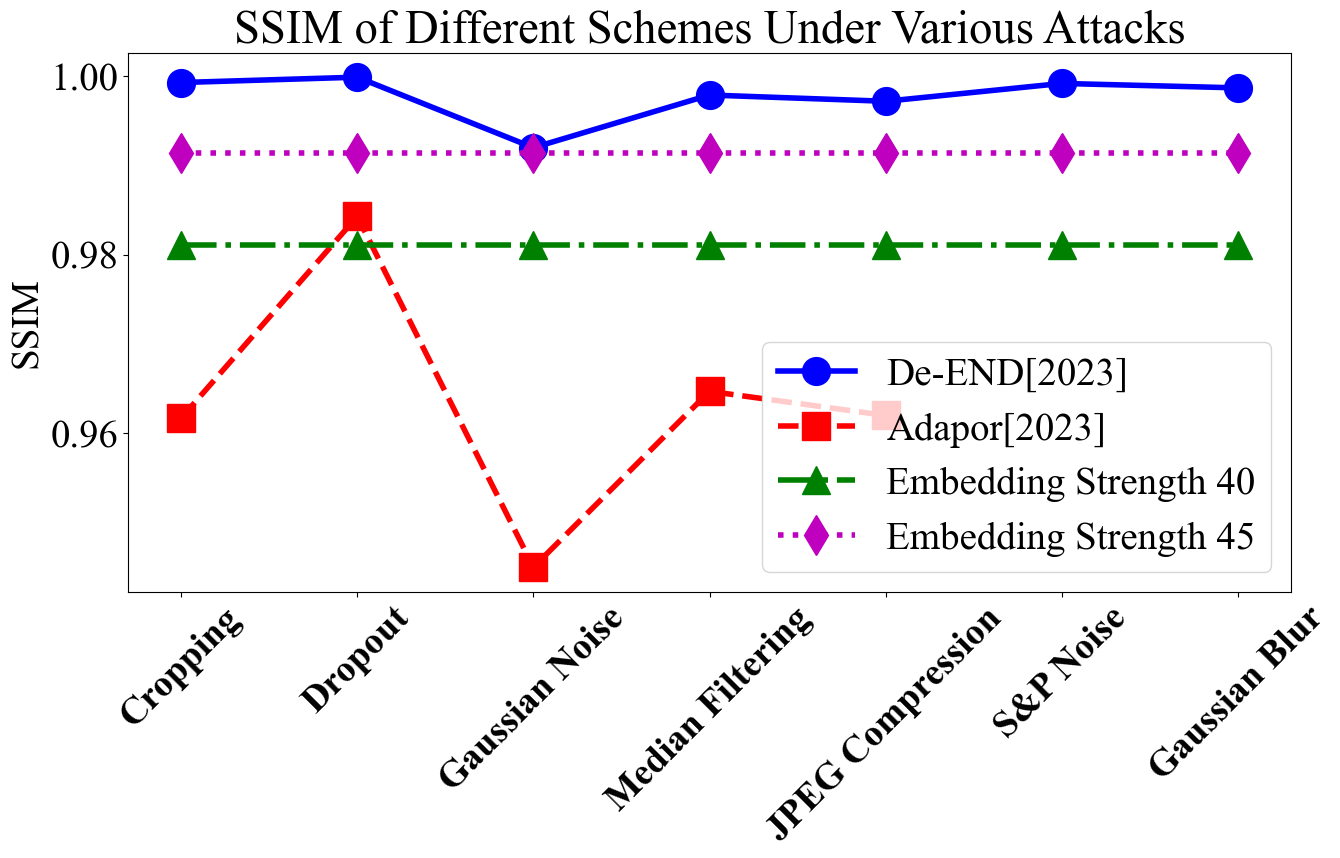

In [111]:
plt.close()
# Data definition
attack_types = ["Cropping", "Dropout", "Gaussian Noise", "Median Filtering", "JPEG Compression", "S&P Noise", "Gaussian Blur"]
De_END_2023 = [0.9993, 0.9999, 0.9920, 0.9979, 0.9972, 0.9992, 0.9987]
Adapor_2023 = [0.9617, 0.9843, 0.9450, 0.9647, 0.9620, np.nan, np.nan]
scheme_40 = [0.9811, 0.9811, 0.9811, 0.9811, 0.9811, 0.9811, 0.9811]
scheme_45 = [0.9914, 0.9914, 0.9914, 0.9914, 0.9914, 0.9914, 0.9914]

# Setting up the plot
plt.figure(figsize=(15, 7))

# Plotting each dataset with specified line width
plt.plot(attack_types, De_END_2023, label="De-END[2023]", marker='o', linestyle='-', color='b', linewidth=4,
         markersize=20)
plt.plot(attack_types, Adapor_2023, label="Adapor[2023]", marker='s', linestyle='--', color='r', linewidth=4,markersize=20)
plt.plot(attack_types, scheme_40, label="Embedding Strength 40", marker='^', linestyle='-.', color='g', linewidth=4,markersize=20)
plt.plot(attack_types, scheme_45, label="Embedding Strength 45", marker='d', linestyle=':', color='m', linewidth=4,markersize=20)

# Adding legend with large font size
plt.legend(loc = 4)

# Adding title and labels with specified font sizes
plt.title('SSIM of Different Schemes Under Various Attacks')
# plt.xlabel('Type of Attack', fontsize=13)  # Set font size for x-axis labels
plt.ylabel('SSIM')


# Set x-axis labels with large font size and rotation for better readability
plt.xticks(attack_types, fontsize=27, rotation=45, fontweight='bold')  # Rotate labels to avoid overlap

# Displaying the plot
plt.show()

In [1]:
cropping_data = {
    "Cropping Ratio (%)": ["10%", "20%", "30%", "40%"],
    "HiDDeN": [4.37, 5.27, 11.25, 23.12],
    "TSDL": [1.28, 1.46, 3.12, 6.25],
    "MBRS": [0.29, 0.78, 2.82, 9.57],
    "DADW": [7.99, 8.33, 8.56, 9.74],
    "De-END": [0.00, 0.00, 0.49, 2.72],
    "PSNR 40": [0.00, 0.00, 0.00, 0.00],
    "PSNR 45": [0.00, 0.06, 0.09, 0.10]
}
dropout_data = {
    "Dropout Ratio (%)": ["60%", "50%", "40%", "30%", "20%"],
    "HiDDeN": [17.29, 13.26, 12.92, 10.42, 9.79],
    "TSDL": [9.58, 7.71, 6.46, 4.79, 2.46],
    "MBRS": [9.37, 7.42, 5.85, 5.27, 3.71],
    "DADW": [19.46, 16.04, 12.29, 9.96, 9.40],
    "De-END": [5.37, 0.49, 0.00, 0.00, 0.00],
    "PSNR 40": [0.50, 0.31, 0.00, 0.00, 0.00],
    "PSNR 45": [0.47, 0.32, 0.24, 0.13, 0.11]
}
gaussian_noise_data = {
    "Variance": ["0.01", "0.02", "0.03", "0.04", "0.05"],
    "HiDDeN": [10.42, 13.54, 16.04, 16.88, 20.83],
    "TSDL": [7.92, 8.75, 11.67, 12.92, 17.08],
    "MBRS": [0.09, 0.58, 1.90, 3.91, 5.85],
    "DADW": [31.25, 39.37, 40.00, 42.29, 43.96],
    "De-END": [0.00, 0.29, 1.66, 3.42, 4.10],
    "PSNR 40": [0.00, 0.00, 0.00, 0.00, 0.00],
    "PSNR 45": [0.06, 0.08, 0.08, 0.17, 0.51]
}
salt_pepper_noise_data = {
    "Dropout Ratio (%)": ["0.01", "0.02", "0.03", "0.04", "0.05"],
    "HiDDeN": [4.88, 6.21, 6.55, 7.08, 9.58],
    "TSDL": [2.71, 4.37, 6.46, 7.29, 8.54],
    "MBRS": [1.95, 1.26, 1.66, 2.44, 3.32],
    "DADW": [9.58, 13.33, 19.58, 24.58, 28.58],
    "De-END": [0.59, 0.49, 0.78, 0.88, 1.27],
    "PSNR 40": [0.00, 0.00, 0.00, 0.00, 0.00],
    "PSNR 45": [0.05, 0.06, 0.06, 0.06, 0.07]
}
gaussian_blur_data = {
    "Variance": ["0.0001", "0.5", "1", "2"],
    "HiDDeN": [4.56, 4.79, 5.67, 15.63],
    "TSDL": [0.08, 0.21, 1.52, 6.79],
    "MBRS": [1.36, 1.75, 2.34, 12.20],
    "DADW": [8.30, 10.20, 23.75, 33.75],
    "De-END": [0.00, 0.00, 0.49, 5.66],
    "PSNR 40": [0.00, 0.00, 0.00, 0.00],
    "PSNR 45": [0.05, 0.05, 0.05, 0.05]
}
median_filtering_data = {
    "Window Size": ["3 x 3", "5 x 5", "7 x 7"],
    "HiDDeN": [13.75, 16.30, 20.29],
    "TSDL": [0.62, 2.79, 4.88],
    "MBRS": [0.58, 1.07, 2.73],
    "DADW": [26.85, 27.29, 39.37],
    "De-END": [0.19, 0.39, 1.66],
    "PSNR 40": [0.06, 0.18, 0.82],
    "PSNR 45": [0.05, 0.29, 3.47]
}
jpeg_compression_data = {
    "Quality Factor (QF)": ["40", "50", "60", "70", "80", "90"],
    "HiDDeN": [13.33, 8.76, 7.08, 6.67, 6.46, 5.62],
    "TSDL": [8.96, 8.54, 6.04, 5.79, 5.65, 5.26],
    "MBRS": [5.17, 5.07, 3.32, 2.34, 2.34, 1.16],
    "DADW": [27.75, 26.68, 25.63, 22.08, 18.95, 13.54],
    "De-END": [1.85, 0.98, 0.00, 0.00, 0.00, 0.00],
    "PSNR 40": [0.90, 0.57, 0.34, 0.27, 0.19, 0.08],
    "PSNR 45": [6.27, 4.51, 3.19, 2.12, 1.62, 0.79]
}


In [2]:
cropping_attack_extended_data = {
    "Cropping Ratio (%)": ["70.00%", "50.00%", "30.00%"],
    "HiDDeN": [31.46, 24.50, 15.80],
    "MBRS": [25.60, 10.50, 0.90],
    "Adapor": [24.70, 10.40, 0.86],
    "PSNR 40": [0.14, 0.02, 0.00],
    "PSNR 45": [0.36, 0.10, 0.06]
}
dropout_attack_extended_data = {
    "Dropout Ratio (%)": ["70.00%", "50.00%", "30.00%"],
    "HiDDeN": [40.60, 26.10, 23.50],
    "MBRS": [0.01, 0.00, 0.00],
    "Adapor": [0.01, 0.00, 0.00],
    "PSNR 40": [0.27, 0.07, 0.00],
    "PSNR 45": [0.95, 0.32, 0.13]
}
gaussian_noise_attack_extended_data = {
    "Variance": ["0.001", "0.002", "0.005", "0.01"],
    "HiDDeN": [23.20, 25.20, 28.10, 30.30],
    "MBRS": [0.03, 0.05, 0.05, 0.10],
    "Adapor": [0.02, 0.02, 0.05, 0.08],
    "PSNR 40": [0.00, 0.00, 0.00, 0.00],
    "PSNR 45": [0.05, 0.05, 0.05, 0.06]
}
median_blur_attack_data = {
    "Window Size": ["3X3", "5X5", "7X7"],
    "HiDDeN": [23.00, 27.60, 28.57],
    "MBRS": [0.00, 0.17, 0.20],
    "Adapor": [0.00, 0.14, 0.14],
    "PSNR 40": [0.06, 0.18, 0.82],
    "PSNR 45": [0.29, 1.05, 3.47]
}
jpeg_compression_attack_data = {
    "JPEG Quality": ["30", "50", "70"],
    "HiDDeN": [39.80, 35.20, 33.40],
    "MBRS": [0.61, 0.03, 0.04],
    "Adapor": [0.51, 0.02, 0.04],
    "PSNR 40": [2.01, 0.57, 0.27],
    "PSNR 45": [9.96, 4.51, 2.12]
}


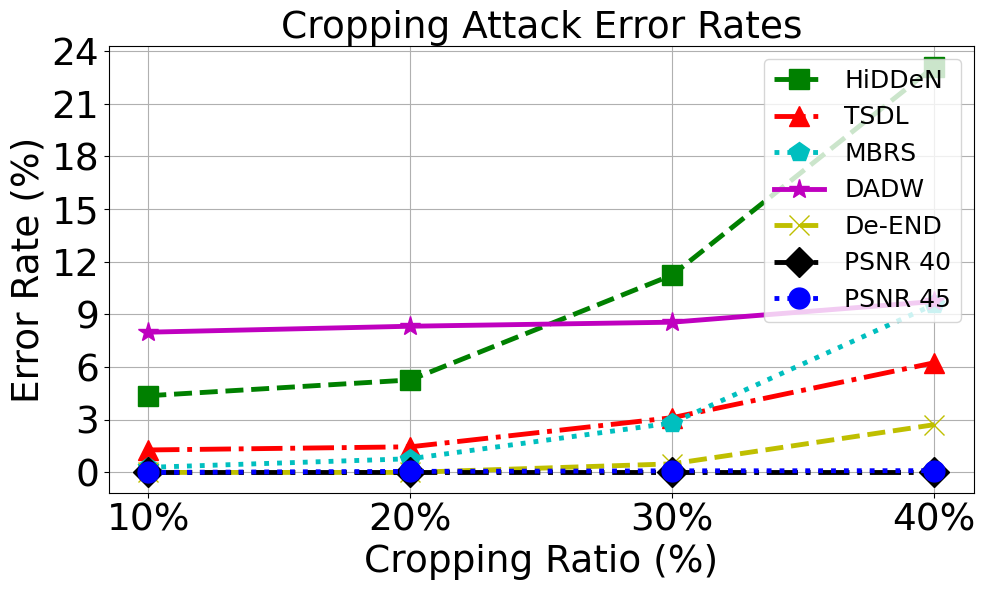

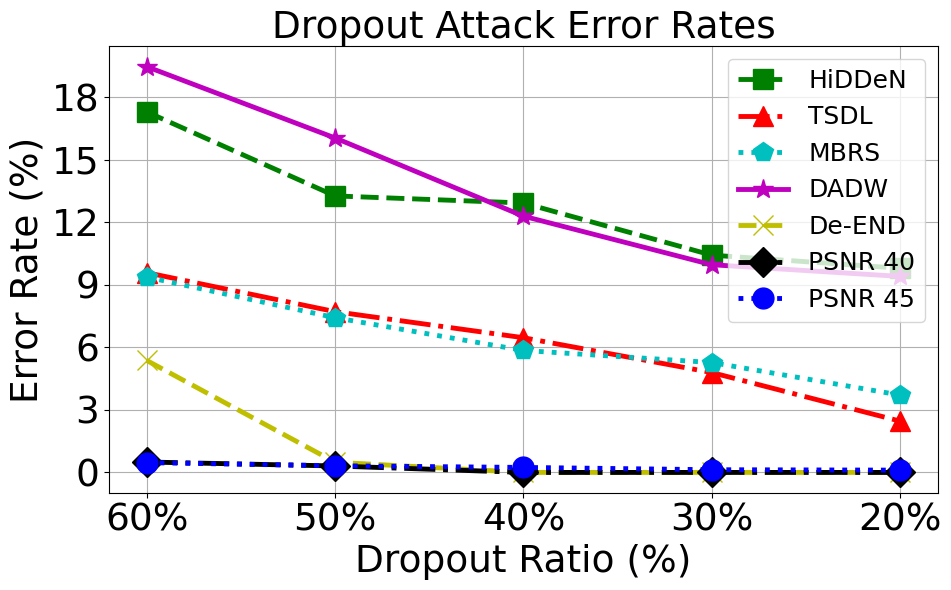

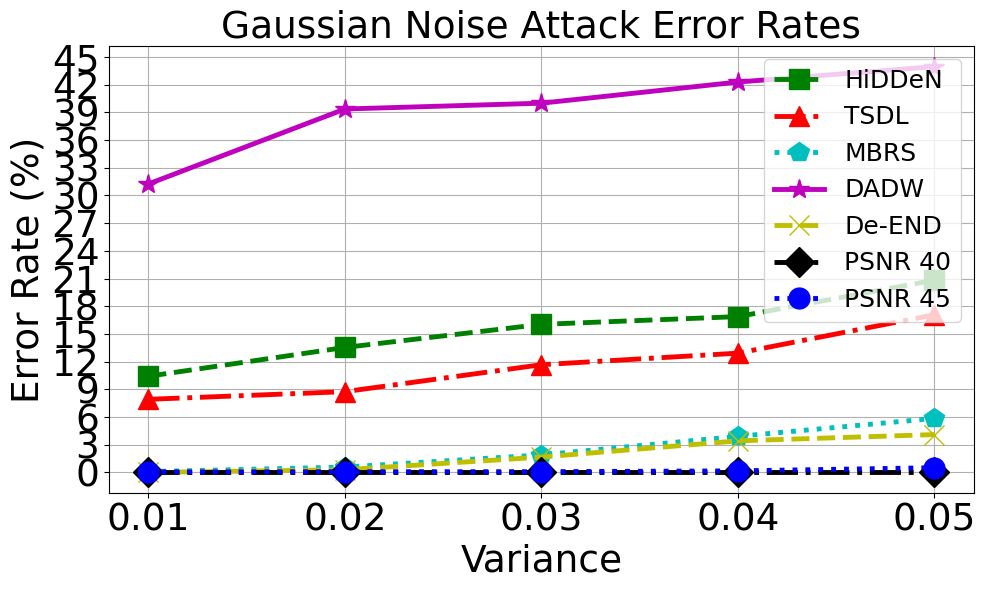

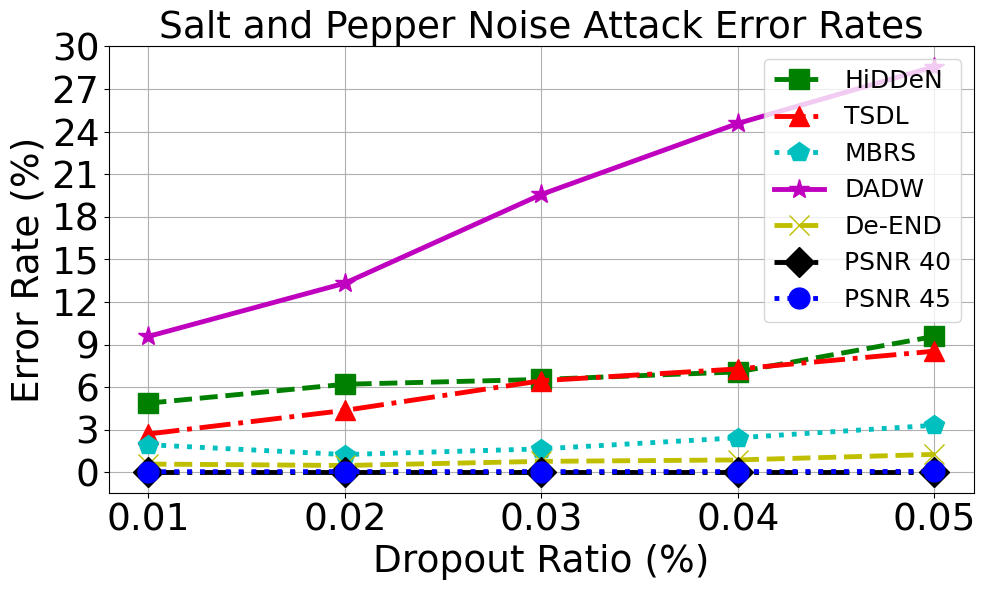

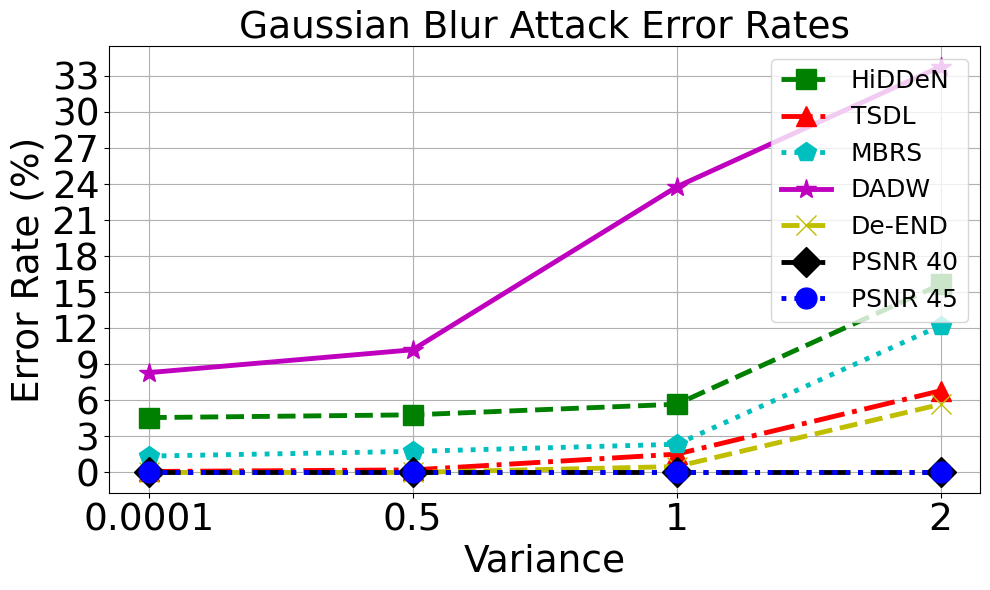

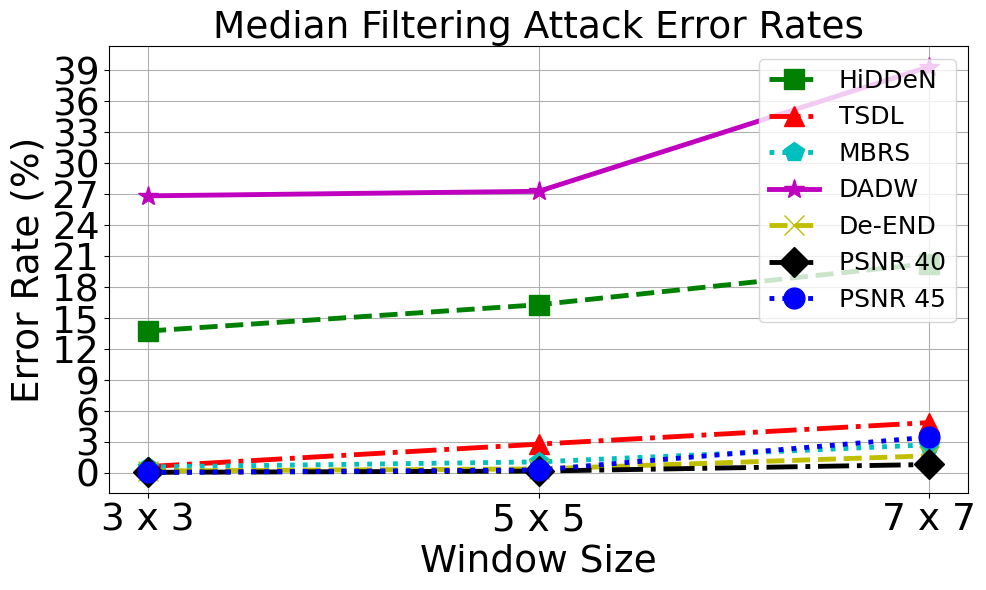

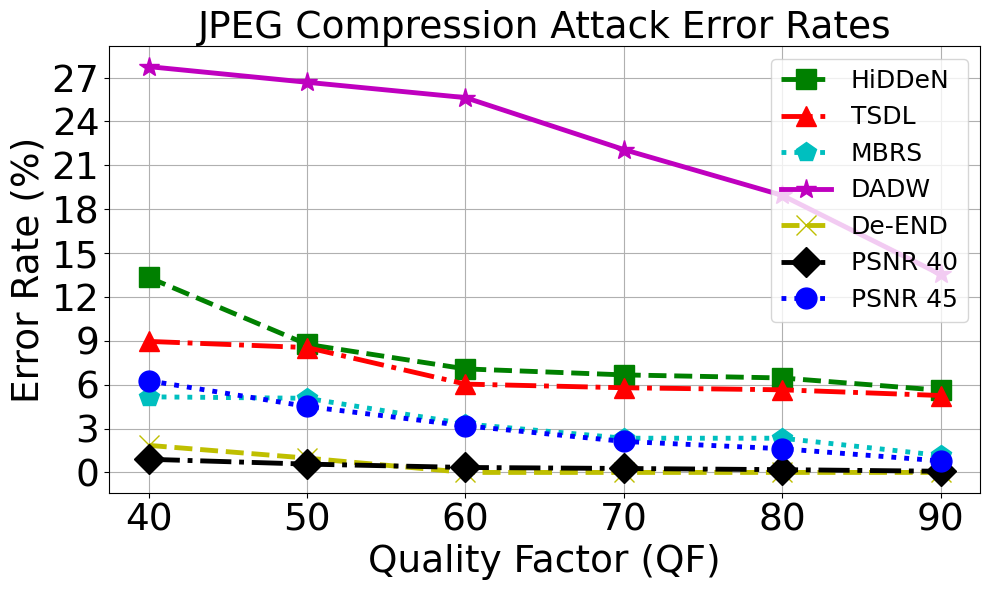

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
all_fig = []
def plot_error_rates(data, title, x_label, y_label):
    """
    Plot error rates from a given dictionary with varied line styles, markers, and colors.
    
    Parameters:
    - data: Dictionary containing the data to plot.
    - title: Title of the plot.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    
    # Define colors and markers for different lines
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    markers = ['o', 's', '^', 'p', '*', 'x', 'D']
    line_styles = ['-', '--', '-.', ':']
    
    # Get the first key's data which should be the x-axis labels
    x_axis = data[next(iter(data))]  
    
    # Plot each key-value pair in the dictionary except the first one
    for i, (key, values) in enumerate(data.items()):
        if key != next(iter(data)):  # Skip the x-axis label data
            plt.plot(x_axis, values, label=key, marker=markers[i % len(markers)], linestyle=line_styles[i % len(line_styles)], 
                     color=colors[i % len(colors)], markersize=15, linewidth=3.5)
    
    # Add plot elements
    plt.title(title, fontsize=27)
    plt.xlabel(x_label, fontsize=27)
    plt.ylabel(y_label, fontsize=27)
    plt.grid(True)
    plt.legend(loc=1, fontsize=18)
    plt.xticks(fontsize=27)
    plt.yticks(fontsize=27)
    plt.tight_layout()  # Adjust layout to make room for label rotation
    
     # 设置Y轴刻度
    ax = plt.gca()  # 获取当前轴
    ax.yaxis.set_major_locator(MultipleLocator(3))  # 主要刻度间隔为0.1
    ax.yaxis.set_minor_locator(MultipleLocator(3))  # 次要刻度间隔为0.05
    
    plt.savefig(f'{title}.png')
    all_fig.append(f'{title}.png')
    plt.show()
# 数据字典集与自定义x轴标签
data_sets = {
    'Cropping Attack': (cropping_data, "Cropping Ratio (%)"),
    'Dropout Attack': (dropout_data, "Dropout Ratio (%)"),
    'Gaussian Noise Attack': (gaussian_noise_data, "Variance"),
    'Salt and Pepper Noise Attack': (salt_pepper_noise_data, "Dropout Ratio (%)"),
    'Gaussian Blur Attack': (gaussian_blur_data, "Variance"),
    'Median Filtering Attack': (median_filtering_data, "Window Size"),
    'JPEG Compression Attack': (jpeg_compression_data, "Quality Factor (QF)")
}

# 绘制图像的函数，现在包括自定义的x轴标签
def plot_all_attacks(data_sets):
    for attack_name, (data, x_label) in data_sets.items():
        plot_error_rates(
            data, 
            f"{attack_name} Error Rates", 
            x_label,  # 使用为每种数据集定义的特定x轴标签
            "Error Rate (%)"
        )

# 调用函数绘制所有图像
plot_all_attacks(data_sets)


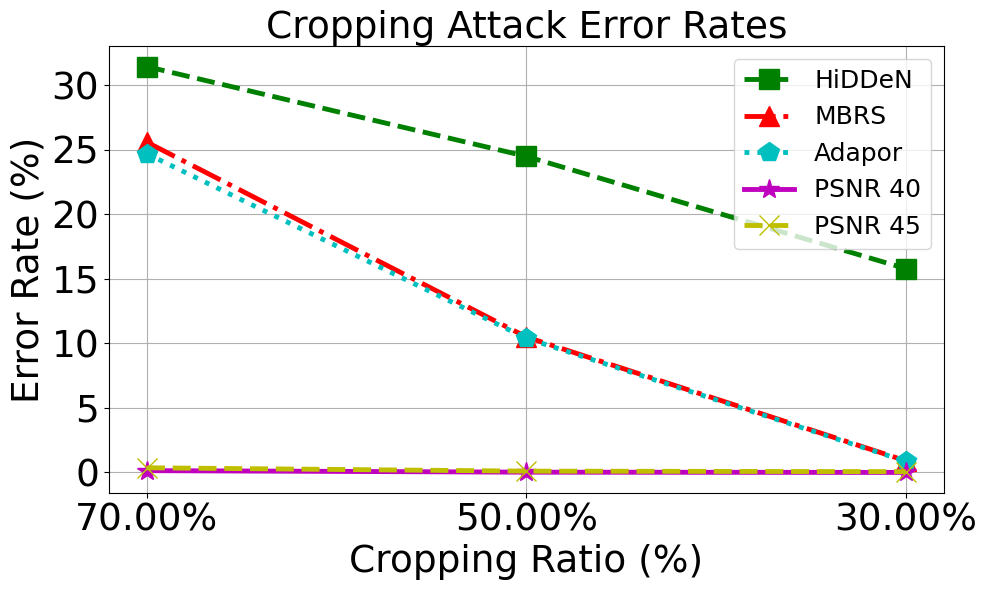

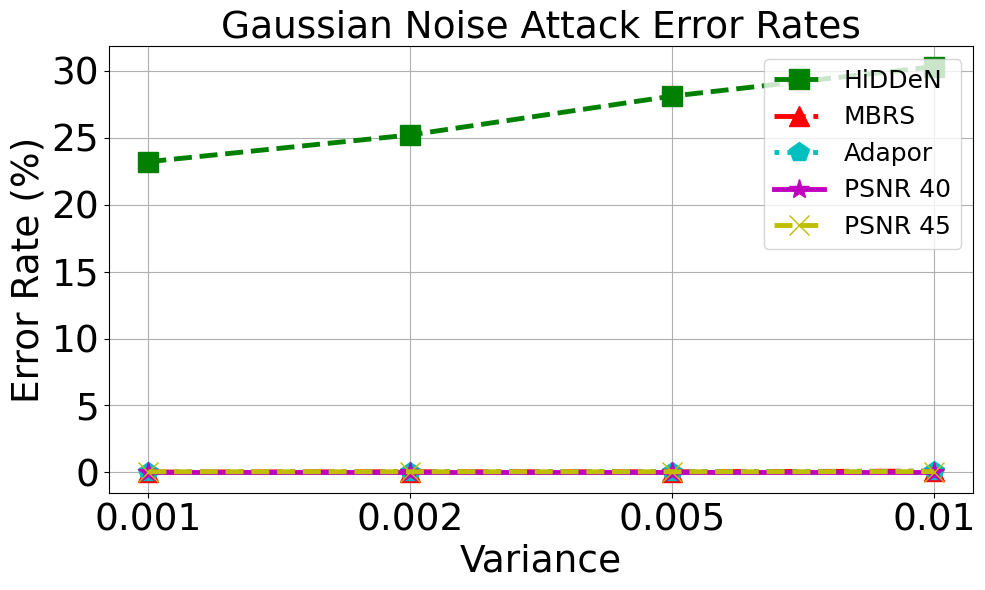

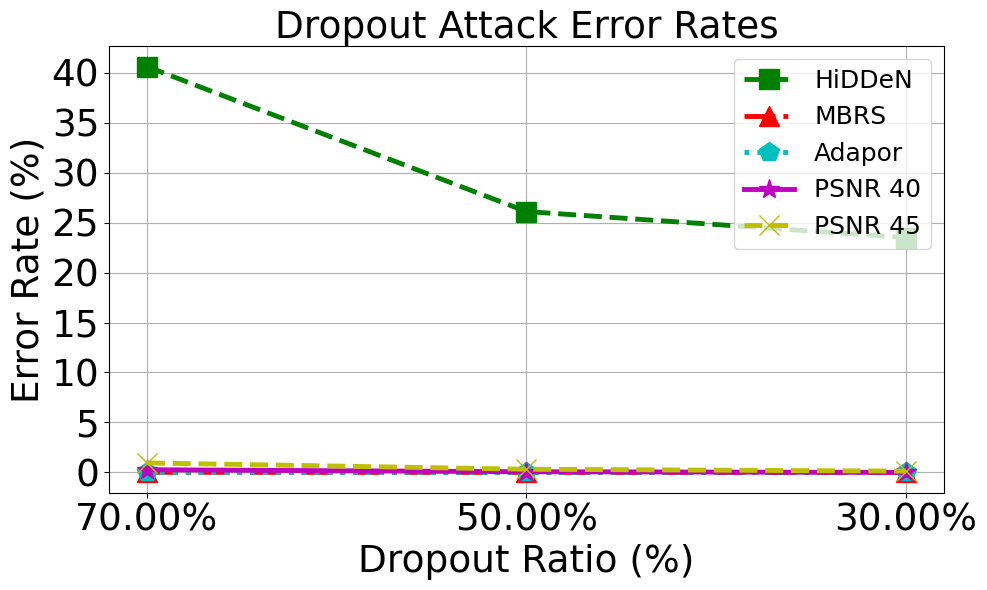

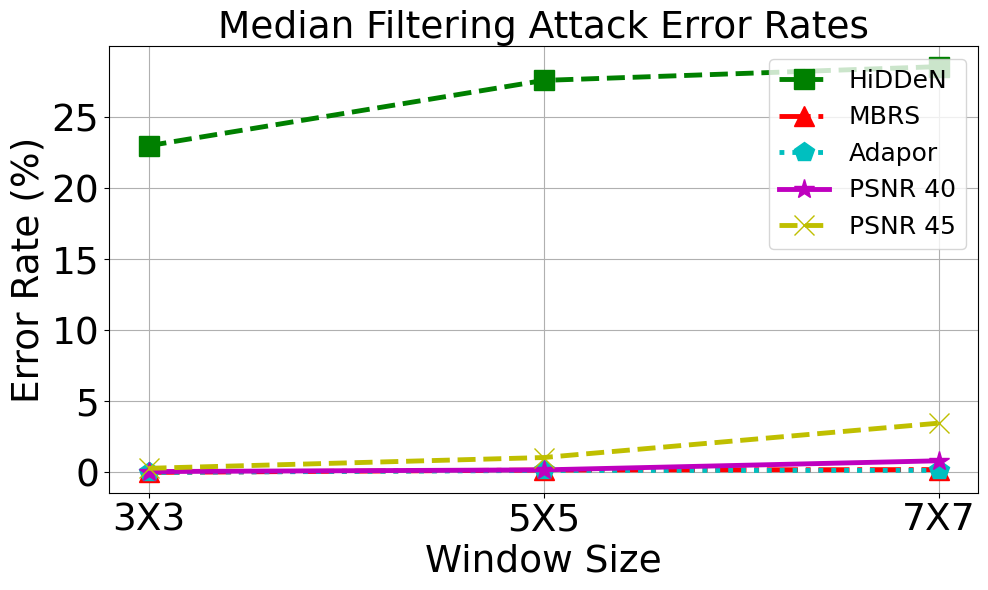

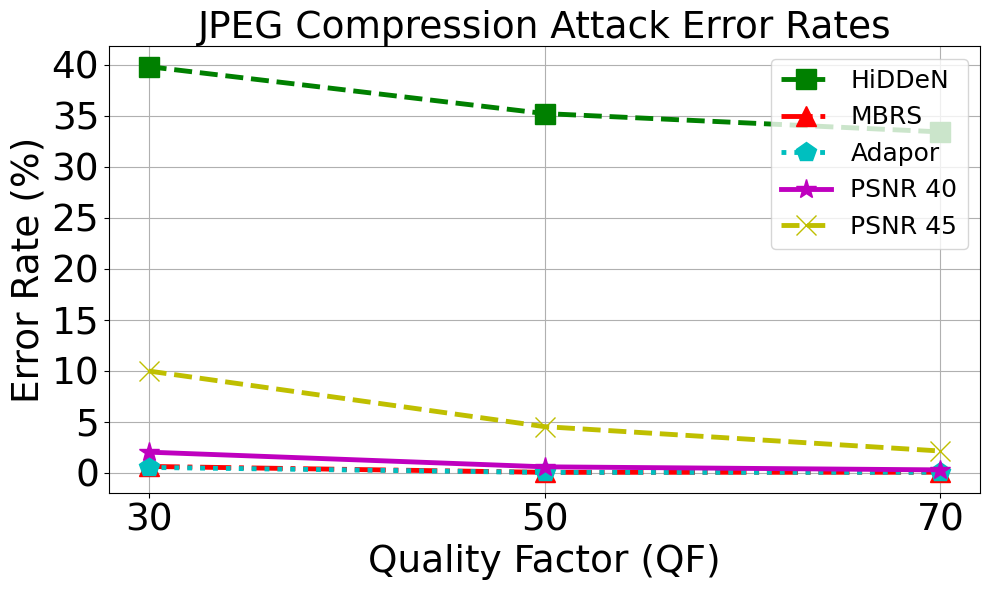

In [36]:
import matplotlib.pyplot as plt
all_fig2 = []
def plot_error_rates(data, title, x_label, y_label):
    """
    Plot error rates from a given dictionary with varied line styles, markers, and colors.
    
    Parameters:
    - data: Dictionary containing the data to plot.
    - title: Title of the plot.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    
    # Define colors and markers for different lines
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    markers = ['o', 's', '^', 'p', '*', 'x', 'D']
    line_styles = ['-', '--', '-.', ':']
    
    # Get the first key's data which should be the x-axis labels
    x_axis = data[next(iter(data))]  
    
    # Plot each key-value pair in the dictionary except the first one
    for i, (key, values) in enumerate(data.items()):
        if key != next(iter(data)):  # Skip the x-axis label data
            plt.plot(x_axis, values, label=key, marker=markers[i % len(markers)], linestyle=line_styles[i % len(line_styles)], 
                     color=colors[i % len(colors)], markersize=15, linewidth=3.5)
    
    # Add plot elements
    plt.title(title, fontsize=27)
    plt.xlabel(x_label, fontsize=27)
    plt.ylabel(y_label, fontsize=27)
    plt.grid(True)
    plt.legend(loc=1, fontsize=18)
    plt.xticks(fontsize=27)
    plt.yticks(fontsize=27)
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.savefig(f'{title}.png')
    all_fig2.append(f'{title}.png')
    plt.show()
# 数据字典集与自定义x轴标签
data_sets = {
    'Cropping Attack': (cropping_attack_extended_data, "Cropping Ratio (%)"),
    'Gaussian Noise Attack': (gaussian_noise_attack_extended_data, "Variance"),
    'Dropout Attack': (dropout_attack_extended_data, "Dropout Ratio (%)"),
    'Median Filtering Attack': (median_blur_attack_data, "Window Size"),
    'JPEG Compression Attack': (jpeg_compression_attack_data, "Quality Factor (QF)")
}

# 绘制图像的函数，现在包括自定义的x轴标签
def plot_all_attacks(data_sets):
    for attack_name, (data, x_label) in data_sets.items():
        plot_error_rates(
            data, 
            f"{attack_name} Error Rates", 
            x_label,  # 使用为每种数据集定义的特定x轴标签
            "Error Rate (%)"
        )

# 调用函数绘制所有图像
plot_all_attacks(data_sets)

In [32]:
all_fig2

[]

In [37]:
from docx import Document
from docx.shared import Cm
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_ALIGN_VERTICAL



# 创建一个新的Word文档
doc = Document('Decoder实验结果[zqj-1].docx')

# 添加表格，指定行数和列数
table = doc.add_table(rows=20, cols=2)
# 填充表格单元格
for i in range(5):
    cell = table.cell(i//2, i%2)
    # cell.width = Cm(6.43)
    # 添加图片
    paragraph_orig = cell.paragraphs[0]
    run = paragraph_orig.add_run()
    run.add_picture(all_fig2[i], width=Cm(11.69),height=Cm(7))

# 保存文档
doc.save('plots_att_sch2.docx')

In [50]:
mixed_attack_data = {
    "PSNR": {
        "MBRS": 34.394,
        "Adapor": 38.55,
        "Scheme(40)": 40.08,
        "Scheme(45)": 45.03
    },
    "SSIM": {
        "MBRS": 0.905,
        "Adapor": 0.925,
        "Scheme(40)": 0.981,
        "Scheme(45)": 0.9914
    },
    "Cropping 0.7": {
        "MBRS": 27.60,
        "Adapor": 26.40,
        "Scheme(PSNR40)": 0.14,
        "Scheme(PSNR45)": 2.12
    },
    "Dropout 0.7": {
        "MBRS": 0.60,
        "Adapor": 0.09,
        "Scheme(PSNR40)": 0.27,
        "Scheme(PSNR45)": 0.95
    },
    "Gaussian Noise Variance 0.01": {
        "MBRS": 0.87,
        "Adapor": 0.72,
        "Scheme (PSNR40)": 0.00,
        "Scheme (PSNR45)": 0.06
    },
    "Median Blur 3 x 3": {
        "MBRS": 0.10,
        "Adapor": 0.07,
        "Scheme(PSNR40)": 0.06,
        "Scheme(PSNR45)": 0.29
    },
    "JPEG Compression 50": {
        "MBRS": 0.42,
        "Adapor": 0.26,
        "Scheme(40)": 1.37,
        "Scheme(45)": 4.51
    }
}


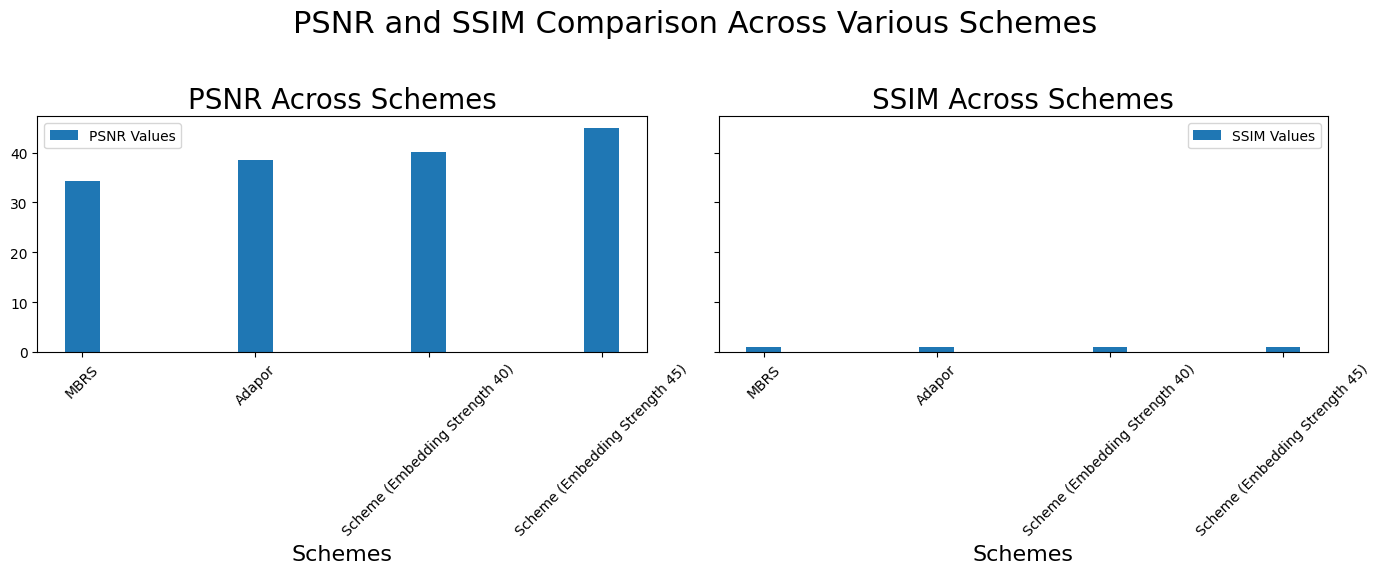

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plot_separated_metrics(data, title):
    # 设置基础数据
    schemes = list(data['PSNR'].keys())  # 方案名称
    metrics = ['PSNR', 'SSIM']  # 指标名称
    num_schemes = len(schemes)
    
    x = np.arange(num_schemes)  # 方案位置
    total_width = 0.8  # 总宽度
    width = total_width / num_schemes  # 每个条形的宽度

    fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(14, 6), sharey=True)

    for ax, metric in zip(axes, metrics):
        values = [data[metric][scheme] for scheme in schemes]
        ax.bar(x, values, width=width, label=f'{metric} Values', tick_label=schemes)
        ax.set_title(f'{metric} Across Schemes', fontsize=20)
        ax.set_xlabel('Schemes', fontsize=16)
        ax.set_xticks(x)
        ax.set_xticklabels(schemes, rotation=45)
        ax.legend()

    plt.suptitle(title, fontsize=22)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the supertitle
    plt.show()

# 数据集
mixed_attack_data = {
    "PSNR": {
        "MBRS": 34.394,
        "Adapor": 38.55,
        "Scheme (Embedding Strength 40)": 40.08,
        "Scheme (Embedding Strength 45)": 45.03
    },
    "SSIM": {
        "MBRS": 0.905,
        "Adapor": 0.925,
        "Scheme (Embedding Strength 40)": 0.981,
        "Scheme (Embedding Strength 45)": 0.9914
    }
}

# 调用函数
plot_separated_metrics(mixed_attack_data, "PSNR and SSIM Comparison Across Various Schemes")


In [1]:
import tensorflow as tf
import keras

class MyLayer(keras.layers.Layer):
    def __init__(self, trainable=True, name=None, dtype=None, dynamic=False, **kwargs):
        super().__init__(trainable, name, dtype, dynamic, **kwargs)
        self.dense1 = keras.layers.Dense(256)
        self.dense2 = keras.layers.Dense(2)
        
    def build(self, input_shape):
        input1_shape = input_shape[0]
        input2_shape = input_shape[1]
        self.dense1.build(input1_shape)
        self.dense2.build(input2_shape)
        return super().build(input_shape)

layer  = MyLayer()
layer.build([[12,256,256],[12,256,256]])



forg_feature, back_feature =    # 前景和背景特征
forg_dens1 = keras.layers.Dense(256)(forg_feature)
forg_dens2 = keras.layers.Dense(2)(forg_dens1)
back_dens1 = keras.layers.Dense(256)(back_feature)
back_dens2 = keras.layers.Dense(2)(back_dens1)

    

2024-07-11 19:01:24.361770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 19:01:24.361913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 19:01:24.516238: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 19:01:26.968107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-11 19:01:30.609901: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-